In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import shap
import dill
import joblib
from sklearn.pipeline import Pipeline

In [13]:
from huggingface_hub import hf_hub_download
import joblib
model = joblib.load(
	hf_hub_download("julien-c/wine-quality", "sklearn_model.joblib")
)

data = pd.read_csv("../data.csv", sep=";")

sample_xai = data.sample(n=100).values.reshape(100, data.shape[1])

f = lambda x: model.predict(x)[:]
explainer = shap.KernelExplainer(f, sample_xai)
shap_values_kernel = explainer(data[:1])

shap_values_kernel


100%|██████████| 1/1 [00:21<00:00, 21.46s/it]


.values =
array([[-0.03955916, -0.13688059,  0.09286147, -0.01400758, -0.00567027,
         0.00877814,  0.01837734, -0.01057107, -0.02076948, -0.1299044 ,
        -0.3126544 ]])

.base_values =
array([5.55])

.data =
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  

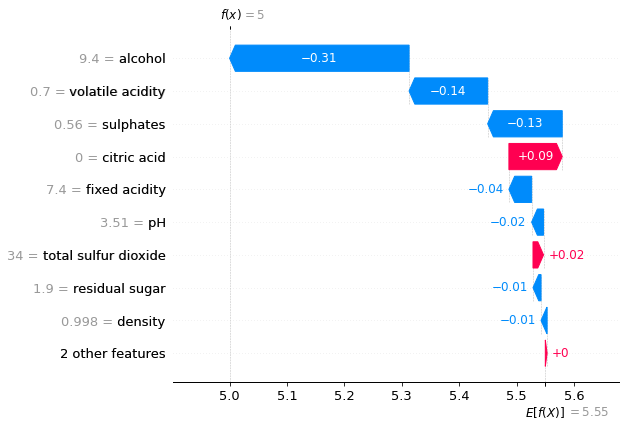

In [18]:
shap.plots.waterfall(shap_values_kernel[:1][0])

In [19]:

with open("./explainer.dill", 'wb') as f:
    dill.dump(explainer,f)